# Plateforme Agnostique de Traitement et d'Analyse des Textes
### Carnet d'expérimentation
---

## Sujet : Infox Embeddings


---

# Initialisations
---

In [1]:
_rs = 42

In [2]:
cd ../..

/Volumes/Geek/Work/Patat


In [3]:
import ast
import importlib
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
tqdm.pandas()

# Préparation Données

---

## Chargement

In [4]:
import patat.util.file

filename = 'data/prod/230517-OIDS-Label.pickle'

df_label = patat.util.file.pickle_load(filename)

## Labels ou textes Nuls

In [5]:
df_label['text'].isna().sum()

0

In [6]:
df_label['infox'].isna().sum()

4

In [7]:
df_label = df_label[df_label['infox'].notna()]

In [8]:
df_label.reset_index(inplace=True)

## Données dupliquées

In [9]:
df_label.duplicated(subset='text').sum()

0

In [10]:
df_label.duplicated(subset='url').sum()

0

# Experience
---

## Preprocessing textes

In [11]:
import patat.util.text

In [12]:
df_label['pp_text']=df_label['text'].apply(patat.util.text.preprocess)

## Paragraphes

In [13]:
df_label['p_count'].describe()

count    900.000000
mean      21.756667
std       29.650424
min        1.000000
25%        8.000000
50%       14.000000
75%       25.000000
max      512.000000
Name: p_count, dtype: float64

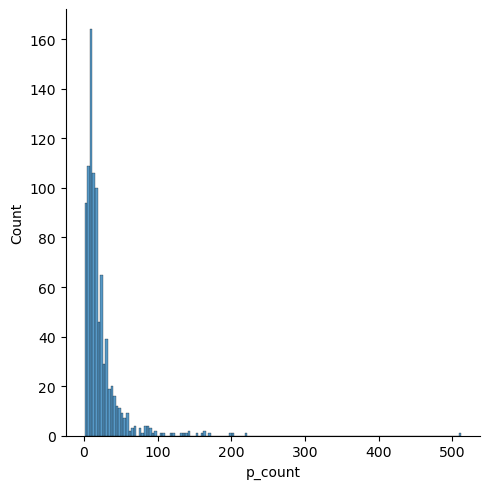

In [14]:
sns.displot(df_label,x='p_count')

## Equilibrage Dataset

<Axes: xlabel='infox', ylabel='count'>

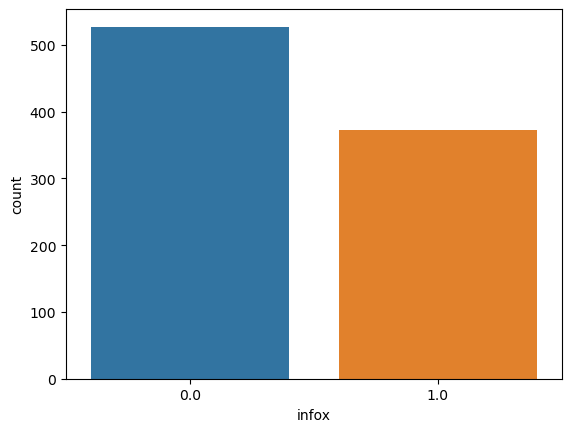

In [15]:
label_count = df_label['infox'].value_counts()
sns.barplot(x=label_count.index, y=label_count)

In [16]:
df_0 = df_label[df_label['infox'] == 0]
df_1 = df_label[df_label['infox'] == 1]

min_sample = min(len(df_0),len(df_1))

df_0=df_0.sample(min_sample,random_state=_rs)
df_1=df_1.sample(min_sample,random_state=_rs)
df_ml = pd.concat([df_0,df_1])

df_ml

,index,url,site,title,article,tags,paragraphs,date_iso,abstract,Auteur,...,denigrement,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h,pp_text
609,610,https://www.francesoir.fr/politique-france/gue...,www.francesoir.fr,Guerre en Ukraine: Emmanuel Macron prévient le...,À l’occasion de la cérémonie pour le 78e anniv...,"[Accueil, Politique]",[À l’occasion de la cérémonie pour le 78e anni...,2022-08-20T00:00:00,,,...,0.0,,CN,Recueil,11,Guerre en Ukraine: Emmanuel Macron prévient le...,2629,239.000000,857bfacdd98e36dda26f1f92cf40c992904d6386,guerre en ukraine: emmanuel macron prévient le...
705,708,https://www.profession-gendarme.com/la-vaccina...,www.profession-gendarme.com,La vaccination Covid : un marquage de « type b...,De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonjo...,"[Actualités, Tribune]",[De: Dr R Date: 16 avril 2022 à 08:17:22 ﻿bonj...,,,NaN,...,NaN,NaN,NaN,Test1,17,La vaccination Covid : un marquage de « type b...,6252,367.764706,166d32300f4d7766a82fe39a1185f35bc347c05f,la vaccination covid : un marquage de « type b...
26,26,https://www.mondialisation.ca/colonialisme-ene...,www.mondialisation.ca,Colonialisme énergétique,Visite d’État du président de la République it...,"[Moyen-Orient et Afrique du Nord, Guerre USA O...",[Visite d’État du président de la République i...,2022-07-09T00:00:00,,Pangea Grandangolo,...,NaN,,GP,Recueil,8,Colonialisme énergétique\nVisite d’État du pré...,2794,349.250000,2a39a60fd5e2c6df0f6ec8ce9fedc2ee2eb4ab4d,colonialisme énergétique\nvisite d état du pré...
565,566,https://www.francesoir.fr/opinions-editos/de-l...,www.francesoir.fr,De l’importance d’une Assemblée vraiment natio...,"Depuis hier soir, ne serions-nous pas en train...","[Accueil, Opinions]","[Depuis hier soir, ne serions-nous pas en trai...",2022-06-20T19:46:00,,Xavier Azalbert,...,NaN,,GP,Recueil,16,De l’importance d’une Assemblée vraiment natio...,4582,286.375000,93b25370fea82c7039f7e2b00c0bd73151101af3,de l importance d une assemblée vraiment natio...
231,232,https://www.polemia.com/quelle-politique-migra...,www.polemia.com,Quelle politique migratoire pour la France ? –...,"Par André-Victor Robert, haut fonctionnaire ♦ ...","[Accueil, Géopolitique, Afrique, analyse, Andr...","[Facebook, Twitter, LinkedIn, Print Friendly, ...",,"Par André-Victor Robert, haut fonctionnaire ♦ ...",André Victor Robert,...,0.0,,FB,Recueil,31,Quelle politique migratoire pour la France ? –...,9123,294.290323,c12a81bb99810b5c13fba93abc5f9cea077a873d,quelle politique migratoire pour la france ? ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,112,https://lesdeqodeurs.fr/des-scientifiques-de-h...,lesdeqodeurs.fr,Des scientifiques de Harvard et de Johns Hopki...,Article original datant du 31/08/22 par SSRNCO...,"[ARNm, COVID, effets secondaires, étude, Harva...",[Les étudiants des universités nord-américaine...,2022-09-23T00:00:00,,,...,0.0,1,FB,Recueil,5,Des scientifiques de Harvard et de Johns Hopki...,1803,360.600000,1f56ed5fa54de7c492154ac8ee0d8d10724f1aa4,des scientifiques de harvard et de johns hopki...
157,158,https://www.voltairenet.org/article217546.html,www.voltairenet.org,L’armée russe achète des exemplaires d’armemen...,L’achat de deux canons automoteurs CAESAR fran...,[],[L’achat de deux canons automoteurs CAESAR fra...,1900-01-01T00:00:00,,,...,NaN,1,FB,Recueil,3,L’armée russe achète des exemplaires d’armemen...,718,239.333333,b3153ba0ad9e32c02a8d49c99a6748e0764b20b5,l armée russe achète des exemplaires d armemen...
522,523,https://lemediaen442.fr/onu-le-premier-ministr...,lemediaen442.fr,ONU – Le Premier ministre de Nouvelle-Zélande ...,L’argument principal de la ministre est que le...,"[Politique, Vidéos, censure, jacinda ardern, ONU]",[L’argument principal de la ministre est que l...,2022-09-29T09:56:31+02:00,"Le terrible discours de Jacinda Ardern, Premie...",,...,0.0,1,FB,Recueil,7,ONU – Le Premier ministre de Nouvelle-Zélande ...,2420,345.714286,3d47a59ef99274fd9ee96c209cc

## Textes partiels

In [17]:
def partial_texts(text,p_count):
    parags = text.split('\n')
    result='\n'.join(parags[:p_count])
    return result

In [18]:
text = df_ml.sample(frac=1).iloc[0]['text']

In [19]:
print(text)

Les masques pourraient générer des cancers : l'avocat Jean-Pierre Joseph lance une procédure
ENTRETIEN — Avec l’avocat au barreau de Grenoble et doyen de l’Ordre, Jean-Pierre Joseph, cette fois au sujet de la procédure qu’il a lancée contre le défaut de marquage de la composition sur les boîtes de masques commercialisées. Certains masques ne présenteraient pas leur composition et ceux contenant du graphène pourraient être extrêmement nocifs pour la santé.
Pourquoi lancez-vous cette procédure ?
Il y a quelques jours, des Grenoblois achetaient des boîtes de masques dans une grande surface de l'agglomération de Grenoble. Comme ils ont entendu dire que certains masques contenaient des nanoparticules d'un produit toxique, lorsqu'ils sont rentrés chez eux, ils examinaient les boites et leur contenu : à leur grande surprise, ils constataient qu'il n'existait aucune étiquette concernant la composition de ces masques. Il était donc impossible de savoir si ceux-ci contenaient un produit toxique 

In [20]:
pt = partial_texts(text,2)
print(pt)

Les masques pourraient générer des cancers : l'avocat Jean-Pierre Joseph lance une procédure
ENTRETIEN — Avec l’avocat au barreau de Grenoble et doyen de l’Ordre, Jean-Pierre Joseph, cette fois au sujet de la procédure qu’il a lancée contre le défaut de marquage de la composition sur les boîtes de masques commercialisées. Certains masques ne présenteraient pas leur composition et ceux contenant du graphène pourraient être extrêmement nocifs pour la santé.


In [49]:
stop_words = ['de',
 'la',
 'le',
 'et',
 'les',
 'des',
 'en',
 'un',
 'que',
 'est',
 'du',
 'avoir',
 'une',
 'être',
 'pour',
 'qui',
 'dans',
 'il',
 'par',
 'pas',
 'sur',
 'au',
 'ce',
 'plaire',
 'qu',
 'faire',
 'ne',
 'pouvoir',
 'avec',
 'été',
 'se',
 'tout',
 'ou',
 'mais',
 'nous',
 'comme',
 'aux',
 'son',
 'ils',
 'cette',
 'on',
 'elle',
 'ces',
 'même',
 'vous',
 'autre',
 'état',
 'leur',
 'si',
 'covid',
 'sa',
 'bien',
 'je',
 'devoir',
 'ses',
 'grand',
 'personne',
 'dire',
 'vaccin',
 'contre',
 'russie',
 'après',
 'donner',
 'cela',
 'voir',
 'sans',
 'pays',
 'mettre',
 'an',
 'aussi',
 'monde',
 'france',
 'depuis',
 'uni',
 'entre',
 'non',
 'nouveau',
 'russe',
 'aller',
 'premier',
 'deux',
 'utiliser',
 'leurs',
 'politique',
 'tous',
 'très',
 'français',
 'selon',
 'également',
 'prendre',
 'dont',
 'où',
 'guerre']

## Tests Entrainement Logistic regression avec Tf/Idf

In [50]:
df_ml=df_ml.sample(frac=1,random_state=_rs+1)

In [51]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [180]:
logreg = LogisticRegression(C=10, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)

In [181]:
iw=None
pipelineLR = Pipeline(steps = [
    ('vectorizer',TfidfVectorizer(preprocessor=None, tokenizer=None, stop_words=iw)), 
    ('classifier',logreg)
                  ])


In [182]:
df_means = {}
for nb_parags in [1,2,3,5,8,13,21,34]:
    
    print(f'Crossvalidating nb_parags={nb_parags}')

    X = df_ml['text'].apply(lambda text: partial_texts(text,nb_parags) )
    y = df_ml['infox']

    classifier = pipelineLR
    scores = cross_validate(classifier, X, y, cv=5,scoring=('roc_auc','f1','accuracy','precision','recall'))
    df_scores=pd.DataFrame(scores)
    df_means[nb_parags] = df_scores.describe().loc['mean']


Crossvalidating nb_parags=1
Crossvalidating nb_parags=2
Crossvalidating nb_parags=3
Crossvalidating nb_parags=5
Crossvalidating nb_parags=8
Crossvalidating nb_parags=13
Crossvalidating nb_parags=21
Crossvalidating nb_parags=34


In [183]:
pd.set_option('display.precision',3)
bench = pd.DataFrame(df_means)
bench.loc[['test_accuracy','test_f1'],[5,8,13]]

,5,8,13
test_accuracy,0.759,0.755,0.778
test_f1,0.762,0.760,0.778


<Axes: >

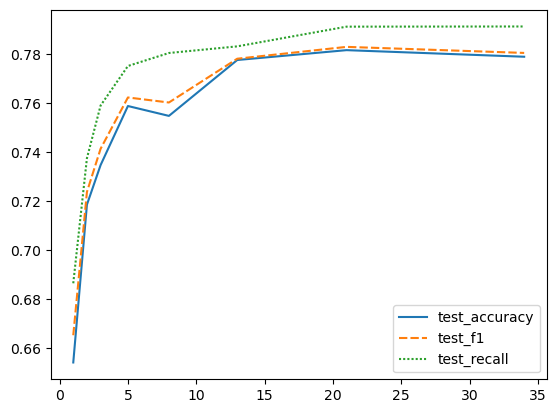

In [184]:
sns.lineplot(data=bench.T[['test_accuracy','test_f1','test_recall']])

<Axes: xlabel='test_accuracy', ylabel='test_recall'>

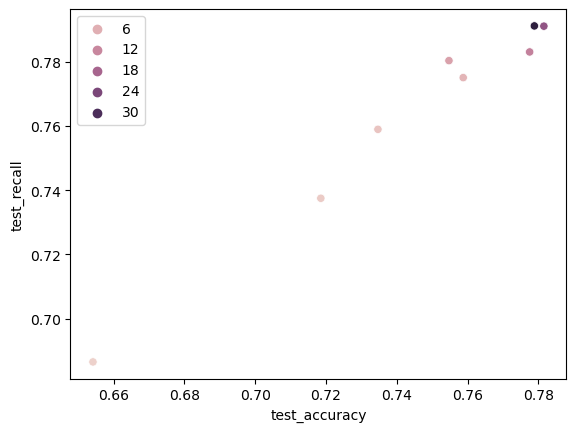

In [185]:
sns.scatterplot(data=bench.T,x='test_accuracy',y='test_recall',hue=bench.T.index)

In [186]:
bench

,1,2,3,5,8,13,21,34
fit_time,0.019,0.043,0.067,0.114,0.147,0.224,0.270,0.298
score_time,0.005,0.009,0.015,0.025,0.036,0.051,0.066,0.079
test_roc_auc,0.700,0.805,0.798,0.820,0.828,0.842,0.847,0.847
test_f1,0.665,0.724,0.741,0.762,0.760,0.778,0.783,0.780
test_accuracy,0.654,0.719,0.735,0.759,0.755,0.778,0.782,0.779
test_precision,0.647,0.713,0.725,0.752,0.742,0.775,0.777,0.773
test_recall,0.686,0.737,0.759,0.775,0.780,0.783,0.791,0.791


# Embedings
---

In [63]:
import torch
device = 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f'device : {device}')

device : mps


In [89]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained('camembert-base')
model = AutoModel.from_pretrained('camembert-base').to(device)

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertModel: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


### Nombre de tokens

In [187]:
def token_count(text):
    input_ids = tokenizer.encode(text,add_special_tokens=True,return_tensors='pt').to(device)
    return input_ids.shape[1]

In [188]:
df_label['token_count']=df_label['text'].progress_apply(token_count)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


  0%|          | 0/900 [00:00<?, ?it/s]

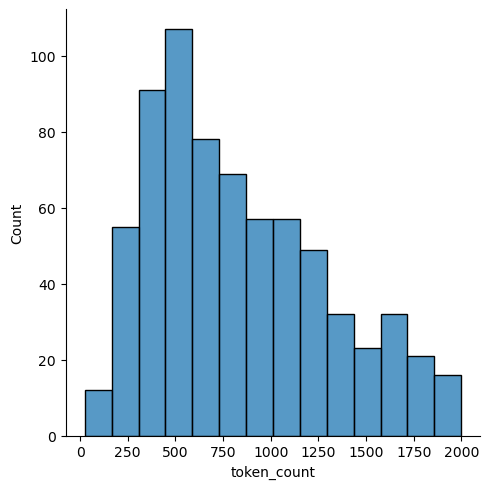

In [198]:
max_tokens = 2000
sns.displot(df_label[df_label['token_count']<max_tokens],x='token_count')

<Axes: xlabel='infox', ylabel='count'>

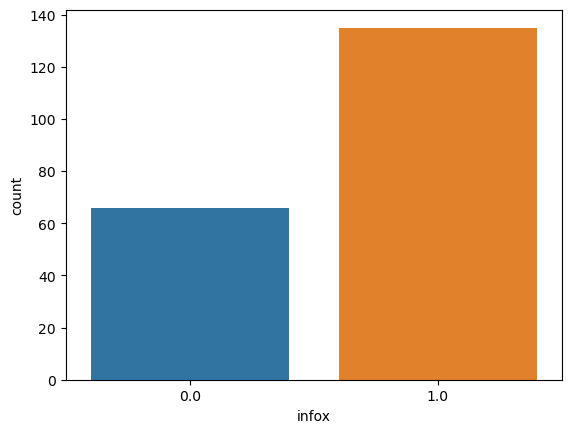

In [199]:
label_count = df_label[df_label['token_count']>max_tokens]['infox'].value_counts()
sns.barplot(x=label_count.index, y=label_count)

In [153]:
## function to generate BERT embeddings
def get_bert_embeddings(text):
    input_ids = tokenizer.encode(text,add_special_tokens=True,return_tensors='pt').to(device)
    input_ids = input_ids[:,:512]
    with torch.inference_mode():
        last_hidden_state = model(input_ids)[0].to(device)
        embeddings = torch.mean(last_hidden_state,dim=1).squeeze().to(device)
        
    return embeddings.cpu().numpy()

In [154]:
text = df_ml['text'][1]
text

'Les réseaux sociaux coupés volontairement ? Que s’est-il passé ?\nIl semblerait que la panne mondiale des réseaux sociaux liés en partie à Facebook ait été volontairement décidée, en effet, tout ne peut sauter au même moment. 1,5 milliards d’utilisateurs down, du jamais vu. était-ce un test ?\nPendant environ sept heures, les réseaux sociaux Facebook et Instagram mais aussi les messageries WhatsApp ou Messenger étaient totalement inaccessibles. Ce mardi matin, tout est revenu à la normale. Facebook a expliqué par un «\xa0changement de configuration erroné\xa0» la panne d’envergure mondiale.\nPlus de trois milliards d’utilisateurs impactés. Le géant américain du numérique, qui a fait cette annonce dans un message sur son blog lundi soir, n’a pas précisé qui a opéré le changement de configuration et si celui-ci était planifié.\nPlus tôt, plusieurs employés de Facebook, qui ont refusé d’être identifiés et avaient perdu accès à leurs propres outils en raison de la panne, ont déclaré à Reu

In [155]:
t = tokenizer.encode(text,add_special_tokens=True,return_tensors='pt')

In [156]:
t.shape[1]

818

In [157]:
t[:,:512].shape

torch.Size([1, 512])

In [175]:
nb_parags = 13
def cut_text(text):
    result = partial_texts(text,nb_parags)
    return result

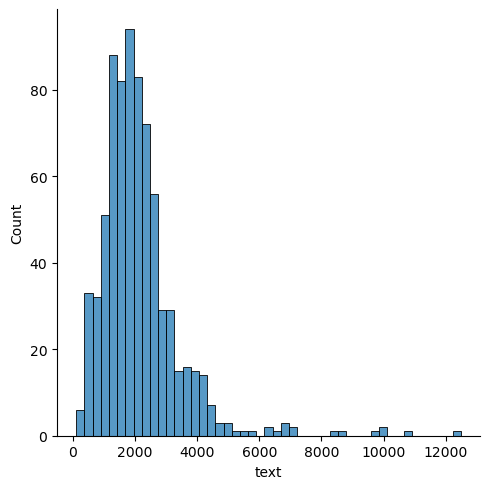

In [169]:
sns.displot(df_ml,x=df_ml['text'].apply(lambda text: len(partial_texts(text,nb_parags))))

In [170]:
df_ml['text_cut']=df_ml['text'].apply(cut_text)

In [176]:
%%time
import numpy as np
## Generate embeddings for the text data using BERT
embeddings = np.array([get_bert_embeddings(text) for text in df_ml['text']])
labels = df_ml['infox']

CPU times: user 27.5 s, sys: 2.82 s, total: 30.4 s
Wall time: 33.5 s


## Crossvalidation Logistic Regression

In [177]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [179]:
%%time
classifier = LogisticRegression(C=1, random_state=_rs, solver='lbfgs', multi_class='ovr', max_iter=1000)
#classifier = MLPClassifier(alpha=1, max_iter=1000, hidden_layer_sizes=(8,8), random_state=_rs)
scores = cross_validate(classifier, embeddings, labels, cv=6,scoring=('accuracy','f1','recall','precision','roc_auc'))
df_scores=pd.DataFrame(scores)
df_scores.mean()

CPU times: user 260 ms, sys: 65.7 ms, total: 326 ms
Wall time: 152 ms


fit_time          0.021
score_time        0.003
test_accuracy     0.770
test_f1           0.770
test_recall       0.778
test_precision    0.765
test_roc_auc      0.850
dtype: float64

## Algo Benchmark

In [118]:
import patat.ml.benchmark

In [119]:
importlib.reload(patat.ml.benchmark)

<module 'patat.ml.benchmark' from '/Volumes/Geek/Work/Patat/patat/ml/benchmark.py'>

In [120]:
bench = patat.ml.benchmark.Benchmark()

In [121]:
df_bench=bench.benchmark(embeddings,labels)

INFO:root:Training Logistic Regression
INFO:root:Training time : 0.019084930419921875 s
INFO:root:Training Neural Network
INFO:root:Training time : 1.393956184387207 s
INFO:root:Training RBF SVM
INFO:root:Training time : 0.31381821632385254 s
INFO:root:Training Gaussian Naive Bayes
INFO:root:Training time : 0.0016489028930664062 s
INFO:root:Training Nearest Neighbors
INFO:root:Training time : 0.0004489421844482422 s
INFO:root:Training Linear SVM
INFO:root:Training time : 0.2600109577178955 s
INFO:root:Training Gaussian Process
INFO:root:Training time : 1.2370100021362305 s
INFO:root:Training Decision Tree
INFO:root:Training time : 0.12503695487976074 s
INFO:root:Training Random Forest
INFO:root:Training time : 0.007836103439331055 s
INFO:root:Training AdaBoost
INFO:root:Training time : 1.5137488842010498 s
INFO:root:Training QDA
/opt/homebrew/Caskroom/miniforge/base/envs/pt39/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnin

In [122]:
df_bench

,roc_auc,f1,accuracy,recall,log_loss,false_positive,false_negative,fit_time,proba_time
Logistic Regression,0.868,0.766,0.780,0.794,7.930,0.127,0.093,1.908e-02,2.732e-04
Neural Network,0.877,0.803,0.820,0.809,6.488,0.093,0.087,1.394e+00,4.222e-04
RBF SVM,0.872,0.767,0.773,0.824,8.170,0.147,0.080,3.138e-01,2.178e-02
Gaussian Naive Bayes,0.816,0.738,0.753,0.765,8.891,0.140,0.107,1.649e-03,4.199e-04
Nearest Neighbors,0.813,0.745,0.753,0.794,8.891,0.153,0.093,4.489e-04,5.445e-03
Linear SVM,0.809,0.723,0.713,0.824,10.333,0.207,0.080,2.600e-01,1.194e-02
Gaussian Process,0.878,0.774,0.793,0.779,7.449,0.107,0.100,1.237e+00,2.490e-02
Decision Tree,0.654,0.688,0.680,0.779,11.534,0.220,0.100,1.250e-01,8.106e-05
Random Forest,0.701,0.667,0.653,0.765,12.495,0.240,0.107,7.836e-03,7.610e-04
AdaBoost,0.803,0.707,0.740,0.691,9.371,0.120,0.140,1.514e+00,3.067e-03


<Axes: xlabel='f1', ylabel='accuracy'>

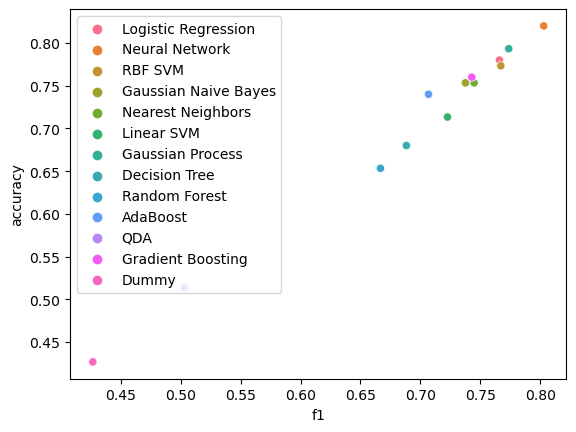

In [123]:
sns.scatterplot(df_bench,y='accuracy',x='f1',hue=df_bench.index)

# Fine Tuning
---

In [205]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("camembert-base", num_labels=2)

Some weights of the model checkpoint at camembert-base were not used when initializing CamembertForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CamembertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of CamembertForSequenceClassification were not initialized from the model checkpoint at camembert-base and are newly initialized: ['classifier.out_proj.weig

In [203]:
from transformers import TrainingArguments

#training_args = TrainingArguments(output_dir="test_trainer")
training_args = TrainingArguments(output_dir="test_230521",use_mps_device=True)

In [204]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")

In [206]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [208]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", evaluation_strategy="epoch")

In [247]:
from sklearn.model_selection import train_test_split
from datasets import Dataset

X = df_ml['text']
y= df_ml['infox']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=_rs)
df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)

In [249]:
df_ml

,level_0,index,url,site,title,article,tags,paragraphs,date_iso,abstract,...,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h,pp_text,text_cut
0,64,64,https://lesmoutonsrebelles.com/des-milliers-de...,lesmoutonsrebelles.com,Des milliers de personnes disent «non» à l’OTA...,Plusieurs milliers de personnes ont manifesté ...,[],[Plusieurs milliers de personnes ont manifesté...,,,...,,FB,Recueil,16,Des milliers de personnes disent «non» à l’OTA...,2804,175.250,9b030fc4445808fbe1036c555471250cd3505f42,des milliers de personnes disent «non» à l ota...,Des milliers de personnes disent «non» à l’OTA...
1,20,20,https://www.medias-presse.info/genderofolie-un...,www.medias-presse.info,Genderofolie : une adolescente ex-trans poursu...,C’est un premier procès dans le monde de la ge...,"[Société, Francesca de Villasmundo]",[C’est un premier procès dans le monde de la g...,,,...,,FB,Recueil,21,Genderofolie : une adolescente ex-trans poursu...,6162,293.429,312f555af98b9d62e8c245be501fec76af5cb8d4,genderofolie : une adolescente ex-trans poursu...,Genderofolie : une adolescente ex-trans poursu...
2,630,632,https://infodujour.fr/sante/4984-deserts-medic...,infodujour.fr,Déserts médicaux : les députés vont-ils céder ?,Après son adoption en Commission des affaires ...,[Santé],[Après son adoption en Commission des affaires...,2016-10-25T14:14:34+01:00,,...,NaN,NaN,Test1,7,Déserts médicaux : les députés vont-ils céder ...,3322,474.571,9329caf31c5634056693f7c08edf6c4eb143c3f9,déserts médicaux : les députés vont-ils céder ...,Déserts médicaux : les députés vont-ils céder ...
3,844,850,https://lezarceleurs.blogspot.com/2022/08/usa-...,lezarceleurs.blogspot.com,USA- Fin des quarantaines et mesures de distan...,De : https://childrenshealthdefense.org/defend...,"[blessés par les vaccins, CDC, mesures de dist...",[ De : https://childrenshealthdefense.org/defe...,,,...,NaN,NaN,Verif,44,USA- Fin des quarantaines et mesures de distan...,13630,309.773,48dae905a8c9416b1ff1dc26c72e858909826287,usa- fin des quarantaines et mesures de distan...,USA- Fin des quarantaines et mesures de distan...
4,879,885,https://www.francesoir.fr/opinions-tribunes/ce...,www.francesoir.fr,Censurer le projet de loi pour le passe vaccin...,"Ce jour à 14 h 30, le Sénat entame les débats ...","[Accueil, Opinions]","[Ce jour à 14 h 30, le Sénat entame les débats...",2021-12-31T18:12:00,,...,NaN,NaN,Verif,17,Censurer le projet de loi pour le passe vaccin...,5620,330.588,d3538af6f048803b66d112abe262ee6f57b1edeb,censurer le projet de loi pour le passe vaccin...,Censurer le projet de loi pour le passe vaccin...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
741,91,91,https://lezarceleurs.blogspot.com/2021/12/mort...,lezarceleurs.blogspot.com,MORTS PAR VACCIN PFIZER - La FDA le savai...,De : https://www.naturalnews.com/2021-12-02-sm...,"[blessures par vaccins, décès, dissimulations,...",[ De : https://www.naturalnews.com/2021-12-02-...,,,...,2,FB,Recueil,30,MORTS PAR VACCIN PFIZER - La FDA le savai...,7241,241.367,03ce5709ddc859530205f735d15df89dc84b7a1d,morts par vaccin pfizer - la fda le savai...,MORTS PAR VACCIN PFIZER - La FDA le savai...
742,470,471,https://lemediaen442.fr/les-sanctions-contre-l...,lemediaen442.fr,Les sanctions contre la Russie provoquent l’ef...,« Nous allons provoquer l’effondrement de l’éc...,"[Décryptage, Économie, Géopolitique, euro, inf...",[« Nous allons provoquer l’effondrement de l’é...,2022-07-09T09:42:25+02:00,,...,2,GP,Recueil,18,Les sanctions contre la Russie provoquent l’ef...,6253,347.389,ab9275fd6e87ab8ed911ceb9b7241fc47e2edead,les sanctions contre la russie provoquent l ef...,Les sanctions contre la Russie provoquent l’ef...
743,80,80,https://lesdeqodeurs.fr/antifa-et-factcheckeur...,lesdeqodeurs.fr,"Antifa et Factcheckeurs, même combat !",Intro et précisionsIl est clair que les antifa...,"[Antifa, Big Pharma, Black Block, Black Lives ...",[Il est clair que les antifas sont un organism...,2022-12-05

In [251]:
df_ml.loc[~df_ml.index.isin(df_train.index)]

,level_0,index,url,site,title,article,tags,paragraphs,date_iso,abstract,...,degre_infox,observateur,source,p_count,text,c_count,p_size,url_h,pp_text,text_cut
2,630,632,https://infodujour.fr/sante/4984-deserts-medic...,infodujour.fr,Déserts médicaux : les députés vont-ils céder ?,Après son adoption en Commission des affaires ...,[Santé],[Après son adoption en Commission des affaires...,2016-10-25T14:14:34+01:00,,...,NaN,NaN,Test1,7,Déserts médicaux : les députés vont-ils céder ...,3322,474.571,9329caf31c5634056693f7c08edf6c4eb143c3f9,déserts médicaux : les députés vont-ils céder ...,Déserts médicaux : les députés vont-ils céder ...
10,340,341,https://www.dreuz.info/2022/10/la-fda-va-publi...,www.dreuz.info,La FDA va publier une étude sur les effets ind...,Première réflexion : J’ai toujours été pro-cho...,"[Home, International, coronavirus]",[Dreuz a besoin de votre soutien financier. Po...,2022-10-06T00:00:00,,...,,FB,Recueil,17,La FDA va publier une étude sur les effets ind...,4372,257.176,1f3dc0cd32405aadd908368395533886a5e13fe2,la fda va publier une étude sur les effets ind...,La FDA va publier une étude sur les effets ind...
23,193,194,https://www.wikistrike.com/2022/08/washington-...,www.wikistrike.com,Washington enverrait des mercenaires afghans c...,Des spécialistes originaires d'Afghanistan par...,[#Politique internationale],[Des spécialistes originaires d'Afghanistan pa...,2022-08-20T00:00:00,,...,2,CN,Recueil,10,Washington enverrait des mercenaires afghans c...,2276,227.600,b4dbb3acce78642a72c77f1d11676cec763dafd9,washington enverrait des mercenaires afghans c...,Washington enverrait des mercenaires afghans c...
30,628,630,https://actu.fr/insolite/les-cinq-infos-insoli...,actu.fr,Les cinq infos insolites de la semaine qu'il n...,Une Youtubeuse qui se maquille avec un préserv...,"[Actu, Insolite]",[Cette semaine aura été marquée par diverses i...,2017-03-11T12:32:00,,...,NaN,NaN,Test1,9,Les cinq infos insolites de la semaine qu'il n...,2123,235.889,f1e80744d46fc4ed520a1a1ca822e43732023ce0,les cinq infos insolites de la semaine qu'il n...,Les cinq infos insolites de la semaine qu'il n...
31,499,500,https://lemediaen442.fr/cest-la-rentree-pour-l...,lemediaen442.fr,C’est la rentrée pour les « vaccins » contre l...,"Variole du singe, énergie en berne, dette de 2...","[Santé, ministère de la santé, moderna, pass s...","[Variole du singe, énergie en berne, dette de ...",2022-09-01T15:31:41+02:00,,...,1,FB,Recueil,12,C’est la rentrée pour les « vaccins » contre l...,5474,456.167,3ce98cbc896fea9094211b874ad40c51f848e819,c est la rentrée pour les « vaccins » contre l...,C’est la rentrée pour les « vaccins » contre l...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
724,719,722,https://lemediaen442.fr/un-cadre-de-pfizer-aff...,lemediaen442.fr,Un cadre de Pfizer affirme qu’Israël est un la...,"« Au début de la pandémie, nous avons établi u...","[Politique, Santé, Société, covid-19, israël, ...","[« Au début de la pandémie, nous avons établi ...",2021-09-13T12:27:36+02:00,,...,NaN,NaN,Test2,9,Un cadre de Pfizer affirme qu’Israël est un la...,2506,278.444,fef67817b8226c68a5661553a8337501719a648a,un cadre de pfizer affirme qu israël est un la...,Un cadre de Pfizer affirme qu’Israël est un la...
732,57,57,https://lesmoutonsrebelles.com/piers-corbyn-as...,lesmoutonsrebelles.com,"Piers Corbyn, astrophysicien et météorologue, ...","L’écologie, c’est le socle du pur et dur mondi...",[],"[L’écologie, c’est le socle du pur et dur mond...",,,...,1,FB,Recueil,16,"Piers Corbyn, astrophysicien et météorologue, ...",2019,126.188,01e00af96b5a2ba1c0e932d41796f79dd8ce283b,"piers corbyn, astrophysicien et météorologue, ...","Piers Corbyn, astrophysicien et météorologue, ..."
741,91,91,https://lezarceleurs.blogspot.com/2021/12/mort...,lezarceleurs.blogspot.com,MORTS PAR VACCIN PFIZER - La FDA le savai...,De : https://www.naturalnews.com/2021-12-02-sm...,"[blessures par vaccins, décès, dissimulations,...",[ De

In [253]:
df_train = df_ml.sample(frac=0.8)
df_test = df_ml.loc[~df_ml.index.isin(df_train.index)]

## PyTorch Dataset

In [2]:
import numpy as np

In [3]:
embeddings_train = np.array([tokenizer.encode(text,add_special_tokens=True,return_tensors='pt') for text in X_train]).cpu()



NameError: name 'X_train' is not defined

In [260]:
import torch

class InfoxDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = InfoxDataset(get_bert_embeddings(X_train), y_train)
val_dataset = InfoxDataset(get_bert_embeddings(X_test), y_test)

TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [258]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

In [259]:
trainer.train()

/opt/homebrew/Caskroom/miniforge/base/envs/pt39/lib/python3.9/site-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


TypeError: new(): invalid data type 'str'

# Sauvegarde des résultats
---

# Conclusions
---

# Bricolages
---